## Importing all modules we need

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

A lot in this notebook is inspired or copied from the following link, so that can be worthwhile to check out.
https://education.molssi.org/python-scripting-biochemistry/chapters/nonlinear_regression_part_2.html

## Import the data 
If not organized as the example data (i.e. a column with the times in seconds followed by absorbance for increasingly higher concentration of substrate), changes will have to be made in the notebook to accomodate this. 

In [2]:
data_abs = pd.read_csv('example-data.csv',index_col=0)

In [3]:
data_abs

,neg ctrl_A,0.05_A,0.5_A,1_A,2_A,5_A
t (s),,,,,,
30,0.000,0.042,0.083,0.098,0.109,0.188
60,-0.004,0.065,0.122,0.158,0.174,0.228
120,0.001,0.096,0.226,0.287,0.313,0.375
180,-0.001,0.149,0.333,0.413,0.439,0.520
240,-0.003,0.181,0.438,0.529,0.563,0.670


## Convert to correct units
To convert absorbance to nmol in one step (only for this particular lab) one can multiply with: 1/( 18 330 M-1cm-1 x 1 cm) x
1050 x 10-6 x 109 = 57.3 nmol. See compendia for more details.

The prepared substrate dilutions are diluted when adding the enzyme (2.4 ml + 600 µl) making the actual substrate concentrations 4/5ths of the prepared ones.

Here we also convert the time from seconds to minutes

In [4]:
data_mol = data_abs*57.3
data_mol.columns=['Neg. control', '0.04','0.4','0.8','1.6','4']
data_mol.index = data_mol.index/60 
data_mol.index.name='time (min)'
data_mol

,Neg. control,0.04,0.4,0.8,1.6,4
time (min),,,,,,
0.5,0.0000,2.4066,4.7559,5.6154,6.2457,10.7724
1.0,-0.2292,3.7245,6.9906,9.0534,9.9702,13.0644
2.0,0.0573,5.5008,12.9498,16.4451,17.9349,21.4875
3.0,-0.0573,8.5377,19.0809,23.6649,25.1547,29.7960
4.0,-0.1719,10.3713,25.0974,30.3117,32.2599,38.3910


Plot the data to see if it's reasonable

<AxesSubplot:xlabel='time / min', ylabel='Product formed / nmol'>

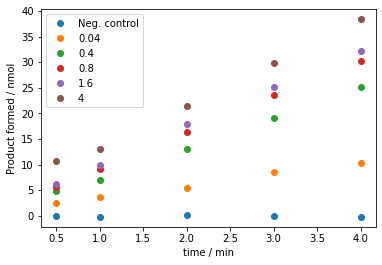

In [5]:
data_mol.plot(ylabel='Product formed / nmol', xlabel='time / min', style='o')

Here we plot it more proper and do linear regression to each substrate concentration, as well as extracting the initial velocities.

The function: y =  2.32 * x + 1.32  Was fitted with a R^2 of:  0.9894  to  0.04
The function: y =  5.9 * x + 1.46  Was fitted with a R^2 of:  0.9989  to  0.4
The function: y =  7.13 * x + 2.13  Was fitted with a R^2 of:  0.9998  to  0.8
The function: y =  7.48 * x + 2.69  Was fitted with a R^2 of:  0.9997  to  1.6
The function: y =  8.07 * x + 5.85  Was fitted with a R^2 of:  0.9968  to  4


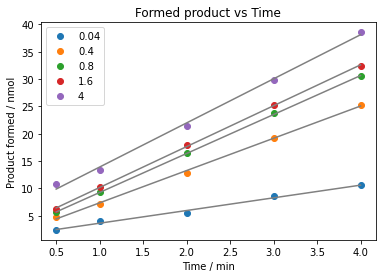

In [6]:
title='Formed product vs Time'
X = data_mol.index
Ys = []
for column in data_mol.columns[1:]:
    Ys.append(np.array(data_mol[column]-data_mol['Neg. control']).reshape((-1,1)))

X=np.array(X).reshape((-1,1))

models = []
for y in Ys:
    model = LinearRegression().fit(X,y)
    models.append(model)
predictions = []
i=0
for y in Ys:
    y_pred = models[i].predict(X)
    i+=1
    predictions.append(y_pred)

fig, ax = plt.subplots()
i=1
for y in Ys:
    plt.plot(X,y,label=data_mol.columns[i],marker='o',linestyle='')
    i+=1
for y_pred in predictions:
    plt.plot(X,y_pred,color='grey')

plt.title(title)

plt.legend()
plt.xlabel('Time / min')
plt.ylabel('Product formed / nmol')
plt.savefig(title+'.svg')
V_0s=[]
i=0
for model in models:
    print('The function: y = ',round(float(model.coef_),2),'* x +',round(float(model.intercept_),2),' Was fitted with a R^2 of: ',round(model.score(X,Ys[i]),4),' to ',data_mol.columns[i+1])
    V_0s.append(float(model.coef_))
    i+=1

For this example data, the velocity is constant during the entirety of the experiment and we can use the full fits. If the velocity decreases after a while one needs to limit the fit to the linear region. 

The function: y =  1.95 * x + 1.66  Was fitted with a R^2 of:  0.9601  to  0.04
The function: y =  5.46 * x + 1.92  Was fitted with a R^2 of:  0.9989  to  0.4
The function: y =  7.17 * x + 2.06  Was fitted with a R^2 of:  0.9999  to  0.8
The function: y =  7.74 * x + 2.41  Was fitted with a R^2 of:  0.9999  to  1.6
The function: y =  7.25 * x + 6.7  Was fitted with a R^2 of:  0.989  to  4


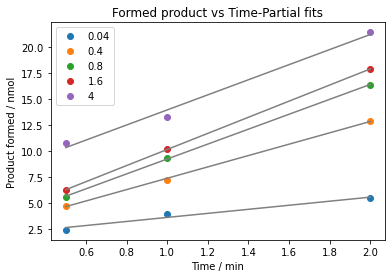

In [7]:
title='Formed product vs Time-Partial fits'
X = data_mol.index[:3] #this becomes the 3 first timepoints as python starts counting at 0 and it's non-inclusive slicing (0,1,2)
Ys = []
for column in data_mol.columns[1:]:
    Ys.append(np.array(data_mol[column][:2]-data_mol['Neg. control'][:2]).reshape((-1,1))) #this also becomes the 3 first points as it in this
    # case is inclusive slicing

X=np.array(X).reshape((-1,1))

models = []
for y in Ys:
    model = LinearRegression().fit(X,y)
    models.append(model)
predictions = []
i=0
for y in Ys:
    y_pred = models[i].predict(X)
    i+=1
    predictions.append(y_pred)

fig, ax = plt.subplots()
i=1
for y in Ys:
    plt.plot(X,y,label=data_mol.columns[i],marker='o',linestyle='')
    i+=1
for y_pred in predictions:
    plt.plot(X,y_pred,color='grey')

plt.title(title)

plt.legend()
plt.xlabel('Time / min')
plt.ylabel('Product formed / nmol')
plt.savefig(title+'.svg')
V_0s_partial=[]
i=0
for model in models:
    print('The function: y = ',round(float(model.coef_),2),'* x +',round(float(model.intercept_),2),' Was fitted with a R^2 of: ',round(model.score(X,Ys[i]),4),' to ',data_mol.columns[i+1])
    V_0s_partial.append(float(model.coef_))
    i+=1

In [8]:
V_0s

[2.3199512195121943,
 5.9018999999999995,
 7.126163414634144,
 7.476951219512194,
 8.065324390243903]

In [9]:
S = pd.Series([0.04,0.4,0.8,1.6,4])

Check that initial velocities vs substrate concentrations resemble a Michaelis-Menten curve.

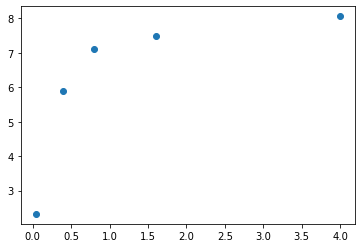

In [10]:
x=S
y=V_0s
fig, ax = plt.subplots()
plt.plot(x,y,'o')

In [12]:
# Create a function for the equation you want to fit. The function should accept 
# as inputs the independent variable(s) and all the parameters to be fit.

def MM(SubConc, Vmax, Km):
    Vi = Vmax * SubConc/(Km + SubConc)
    return Vi

# Test the function to see if it produces the expected output by entering approximate values
# for Vmax (where the curve seem to plateau) and Km (substrate concentration where
# initial velocity (V_0) is half of Vmax) and compare these to the actual velocities, if they
# are roughly similar then everything works.


MM(x, 8, 0.4)

0    0.727273
1    4.000000
2    5.333333
3    6.400000
4    7.272727
dtype: float64

Do the actual fitting of the equation to the data. See https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html for more information. 

In [13]:
popt, pcov = curve_fit(MM, x, y,bounds=(0,20)) 
# we can't get negative parameters (Km, Vmax)
# so therefore we add the bounds.


# Extract the fit parameters from the output of curve_fit.
Vmax = popt[0]
Km = popt[1]

# Extract one standard deviation for each parameter
stdev = np.sqrt(np.diag(pcov)) # returns one standard deviation for each parameter
print(f'Vmax for this reaction: {Vmax:.2f} +/- {stdev[0]:.2f}')
print(f'Km for this reaction: {Km:.2f} +/- {stdev[1]:.2f}')


Vmax for this reaction: 8.10 +/- 0.22
Km for this reaction: 0.12 +/- 0.02


Plot the fit to inspect if it's reasonable.

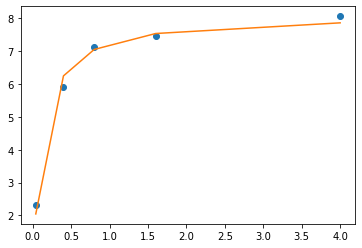

In [14]:


fit_y = MM(x, Vmax, Km) # calculates y values based on the curve_fit parameters
# using your fit model to see how well your model fits the data.

# Graph your original data and the fit equation
plt.plot(x, y, 'o', label='data') # the experimental data
plt.plot(x, fit_y, '-', label='fit') # the fit equation

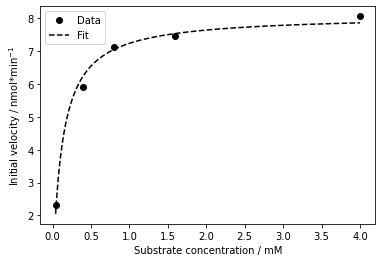

In [16]:
# To generate a smoother fitted curve
smooth_x = np.linspace(np.min(x), np.max(x), 1000) # x value range with 1000 points
smooth_y = MM(smooth_x, Vmax, Km) # y values for the 1000 points in smooth_x

plt.plot(x, y, 'o', label='Data', color='black') # plot of the experimental data
plt.plot(smooth_x, smooth_y, 'black', label = 'Fit', linestyle='--') # plot of the fit data
plt.xlabel('Substrate concentration / mM')
plt.ylabel(r'Initial velocity / nmol*min$^{-1}$')
plt.legend() # legend added
plt.savefig('MM-plot.svg') # by changing to .png, .pdf etc. you can change the export format to whatever suits you.